## 1. 工作原理

贝叶斯模型是最简单的分类模型，基于贝叶斯理论(条件概率)。贝叶斯分类器的运算速度极快，且预测精度很高。

参考：

* [datacamp](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)
* [machinelearningmastery](https://machinelearningmastery.com/naive-bayes-tutorial-for-machine-learning/)
* [machinelearningplus](https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code/)

核心术语：

* 条件概率：$P(B/A) = \frac{P(B) * P(A/B)}{P(A)}$
* 先验概率：某结果发生的概率，通常基于该结果发生的频率统计
* 后验概率：在给定预测因子的情况下，出现某结果的概率

朴素贝叶斯模型的理解可以分为两个部分：“朴素(naive)”的含义是对特征的分布做出严格的假设，例如服从正态分布或多项式分布；贝叶斯模型是指利用贝叶斯理论即条件概率，评估目标变量属于某类别的概率。

朴素贝叶斯模型的工作原理可以用下列公式简单概括：

$$P(L/features) = \frac{P(L) * P(features/L)}{P(features)}$$

* $P(features)$: 某特征出现的概率
* $P(L)$: 目标变量某类别出现的概率
* $P(features/L)$: 某类别出现的情况下具备某特征的概率
* $P(L/features)$: 某些特征出现的情况下某类别出现的概率

## 2. 简单案例分析

根据天气状况预测是否进行球赛。

首先收集天气状况和球赛数据，天气状况分为'sunny','rainy','overcast'三类，球赛结果分为'play','no'两类。

如何应用贝叶斯理论？

1. 根据样本计算先验概率，如$P(whether=sunny)$，$P(play=yes)$等
2. 使用条件概率公式，计算$P(play/whether)$

![simple example](pictures/naive_bayes_example.png)

## 3. Sklearn实现

基于特征服从不同分布的假设，sklearn实现了3种不同的模型：

1. 高斯朴素贝叶斯 --> 假设特征服从正态分布
2. 多项式朴素贝叶斯 --> 假设特征服从多项式分布
3. 伯努利朴素贝叶斯 --> 假设特征服从二项分布

### 3.1 高斯朴素贝叶斯

模型假设特征服从正态分布，且相互独立。

sklearn提供的接口函数：GaussianNB，无需调整超参数。

![gaussian_naive_bayes](pictures/gaussian_naive_bayes.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
%matplotlib inline

Accuracy score = 0.967


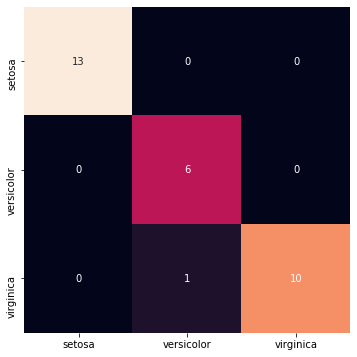

In [3]:
# 使用IRIS数据集
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集和检验集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 创建模型对象
model = GaussianNB()

# 拟合数据
model.fit(X_train, y_train)

# 模型预测
y_pred = model.predict(X_test)

# 评估模型预测能力，混淆矩阵和准确率
fig, ax = plt.subplots(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt="d", cbar=False, ax=ax,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score = {round(acc,3)}")

model.predict_prob用于计算目标变量每个类别的概率值，返回$n*m$矩阵，$n$是测试集的观测值数量，$m$是目标变量类别的数量，按照类别名称(编码)排列，可通过model.classes_属性获取列名称。

In [4]:
probs = model.predict_proba(X_test)
probs_df = pd.DataFrame(np.round(probs, 2), columns=model.classes_)
probs_df.head(10)

,0,1,2
0,0.0,0.92,0.08
1,0.0,0.00,1.00
2,0.0,0.00,1.00
3,0.0,1.00,0.00
4,1.0,0.00,0.00
5,0.0,0.27,0.73
6,0.0,1.00,0.00
7,1.0,0.00,0.00
8,1.0,0.00,0.00
9,0.0,1.00,0.00


### 3.2 多项式朴素贝叶斯

模型假设特征服从多项式分布，适用于特征是计数或频率的情况，常用于文本分类，在文本分类中会把文本转化为词语计数，然后拟合分类模型。

sklearn提供的接口函数：MultinomialNB, 有一个重要的超参数'alpha'，通常使用默认值'alpha=1.0'.

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline

0.8016759776536313


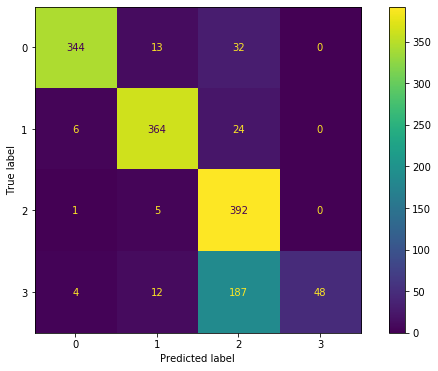

In [11]:
# 使用'newsgroups'数据集，包含18000多条新闻，被划分为20个不同类别
# 为简单起见，加载几个类别的数据
categories = [
    'talk.religion.misc',
    'soc.religion.christian',
    'sci.space',
    'comp.graphics'
]
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)

# 将文本数据转化为数值特征
vec = TfidfVectorizer()
X_train = vec.fit_transform(train.data)
X_test = vec.transform(test.data)
y_train = train.target
y_test = test.target

# 多项式朴素贝叶斯分类器
model = MultinomialNB(alpha=1.0)

# 拟合数据，训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估预测精度
fig, ax = plt.subplots(figsize=(10, 6))
metrics.plot_confusion_matrix(model, X_test, y_test, values_format="d", ax=ax)

print(metrics.accuracy_score(y_test, y_pred))

### 3.3 伯努利朴素贝叶斯

伯努利朴素贝叶斯假设特征服从伯努利分布，即特征只能取两个值，通常用1和0表示，1表示感兴趣的事情发生，0表示不发生。

sklearn提供的接口函数：BernoulliNB, 有一个重要的超参数'binarize'，用于将普通的连续性变量转化为二元变量。

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

0.8933333333333333


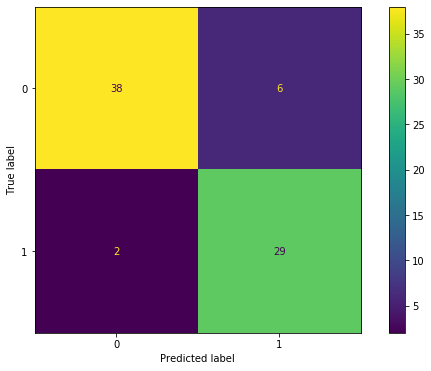

In [22]:
# 创建虚假数据集
# 注意：特征是连续性变量，并非单纯的二元变量，特征转换将在创建模型那步完成
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, random_state=123)

# 划分训练集和检验集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# 创建模型，选择超参数
# 如果特征已经是伯努利变量，可直接拟合模型
# 如果特征是普通连续性变量，可使用binarize=threshold将特征转化为二元变量
model = BernoulliNB(binarize=0.0)  # 使用0作为划分的阈值

# 拟合数据
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估预测精度
fig, ax = plt.subplots(figsize=(10, 6))
metrics.plot_confusion_matrix(model, X_test, y_test, values_format="d", ax=ax)
print(metrics.accuracy_score(y_test, y_pred))